# Gallery Examples
Here are some examples showing how to use this package. We'll start by showcasing the basic features, then progressively add more options.

In [1]:
# first, import the modules from the package
from antarctic_plots import profile
from antarctic_plots import fetch
from antarctic_plots import utils

## Simple cross section
### 1a) line defined by 2 coordinates

filling grid nans with "0"
filling grid nans with "0"
No data profiles to plot


psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


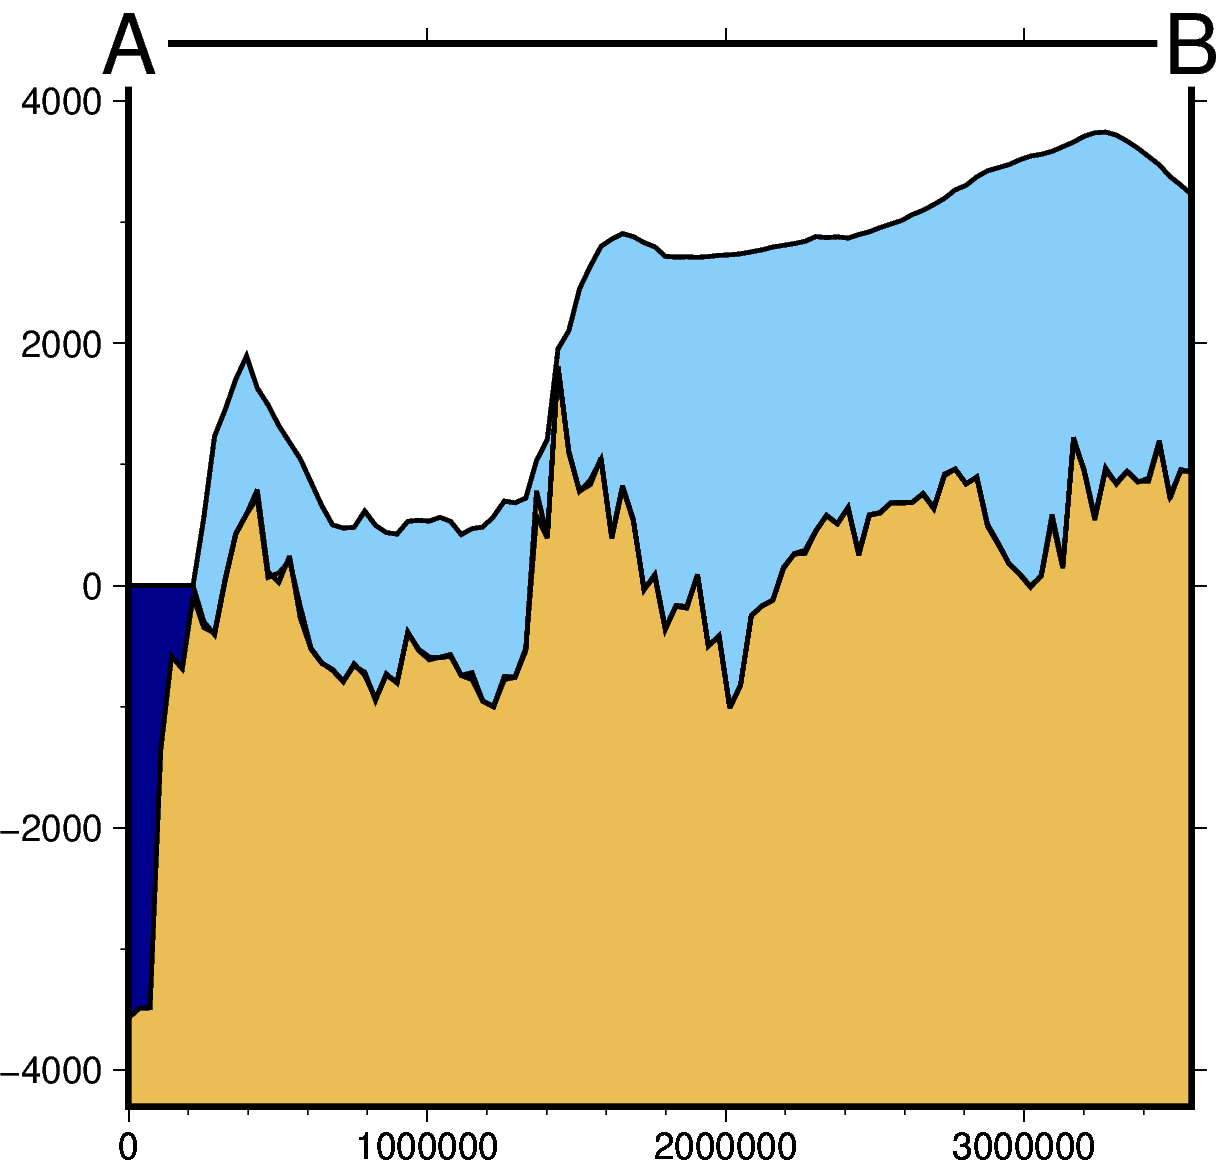

In [2]:
# define to coordinates for a start and end of the line, in meters east and north (EPSG3031).

# from MBL to EANT
a=(-1200e3,-1400e3)
b=(1000e3, 1400e3)

# siple coast profile
# a=(-590e3,-1070e3)
# b=(-100e3,-545e3)

# call the main function, input the starting and ending points, and disable the map. 
profile.plot_profile(
    method='points',
    start=a,
    stop=b,
    add_map=False,
    )

### 1b) change sampling resolutions

filling grid nans with "0"
filling grid nans with "0"
No data profiles to plot


psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


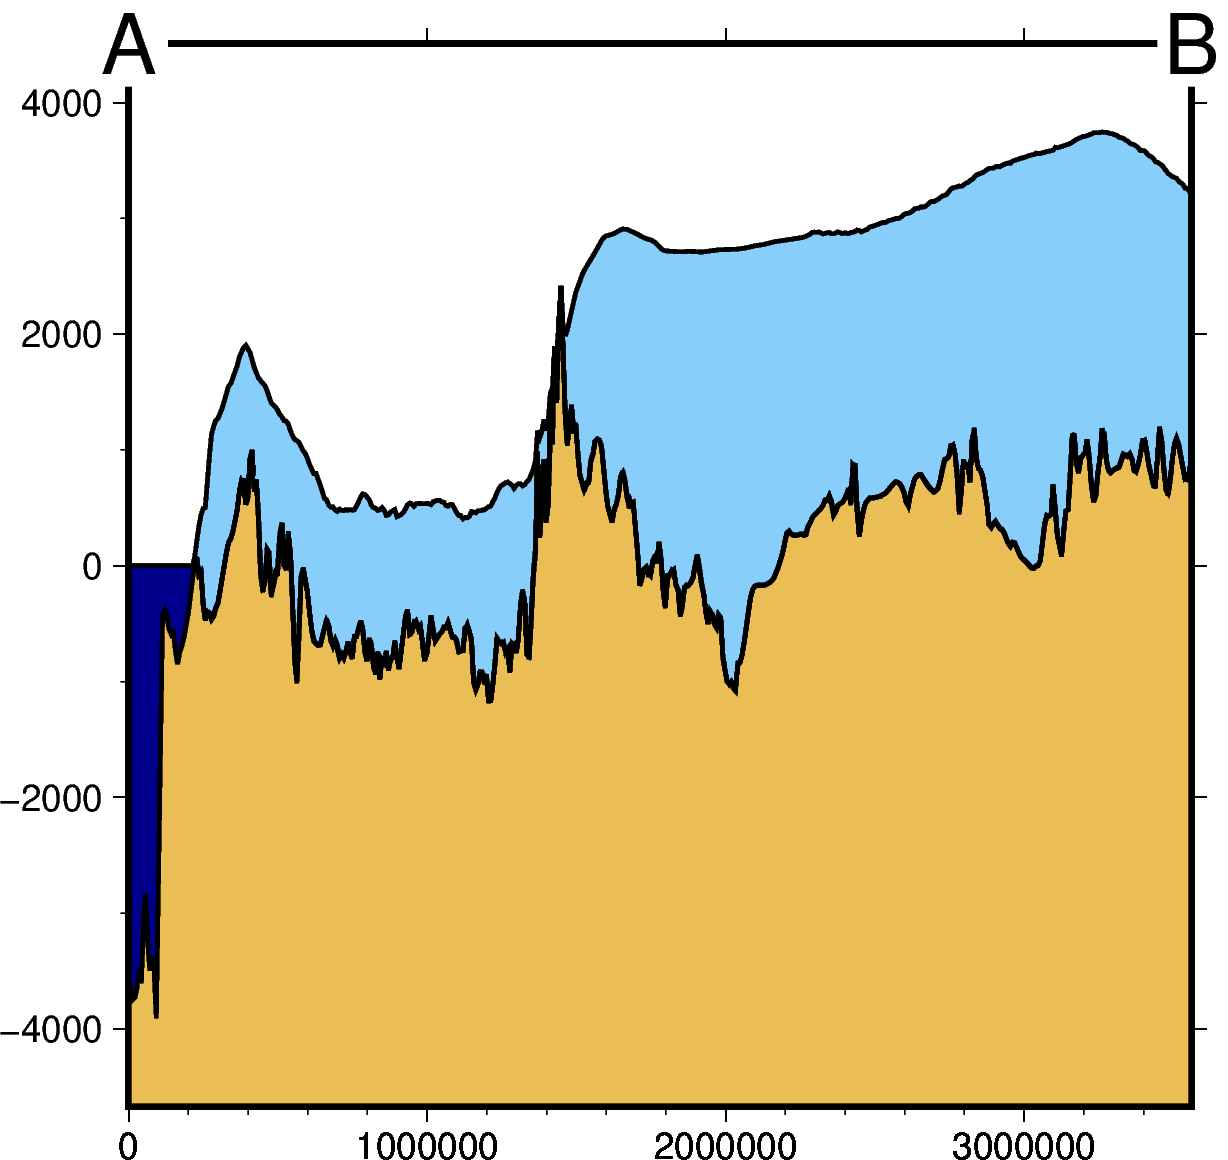

In [3]:
# increase the resolution with the parameter "num"
profile.plot_profile(
    method='points',
    start=a,
    stop=b,
    num=500,
    add_map=False,
    )

### 2a) line definded by a shapefile

filling grid nans with "0"
filling grid nans with "0"
No data profiles to plot


psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


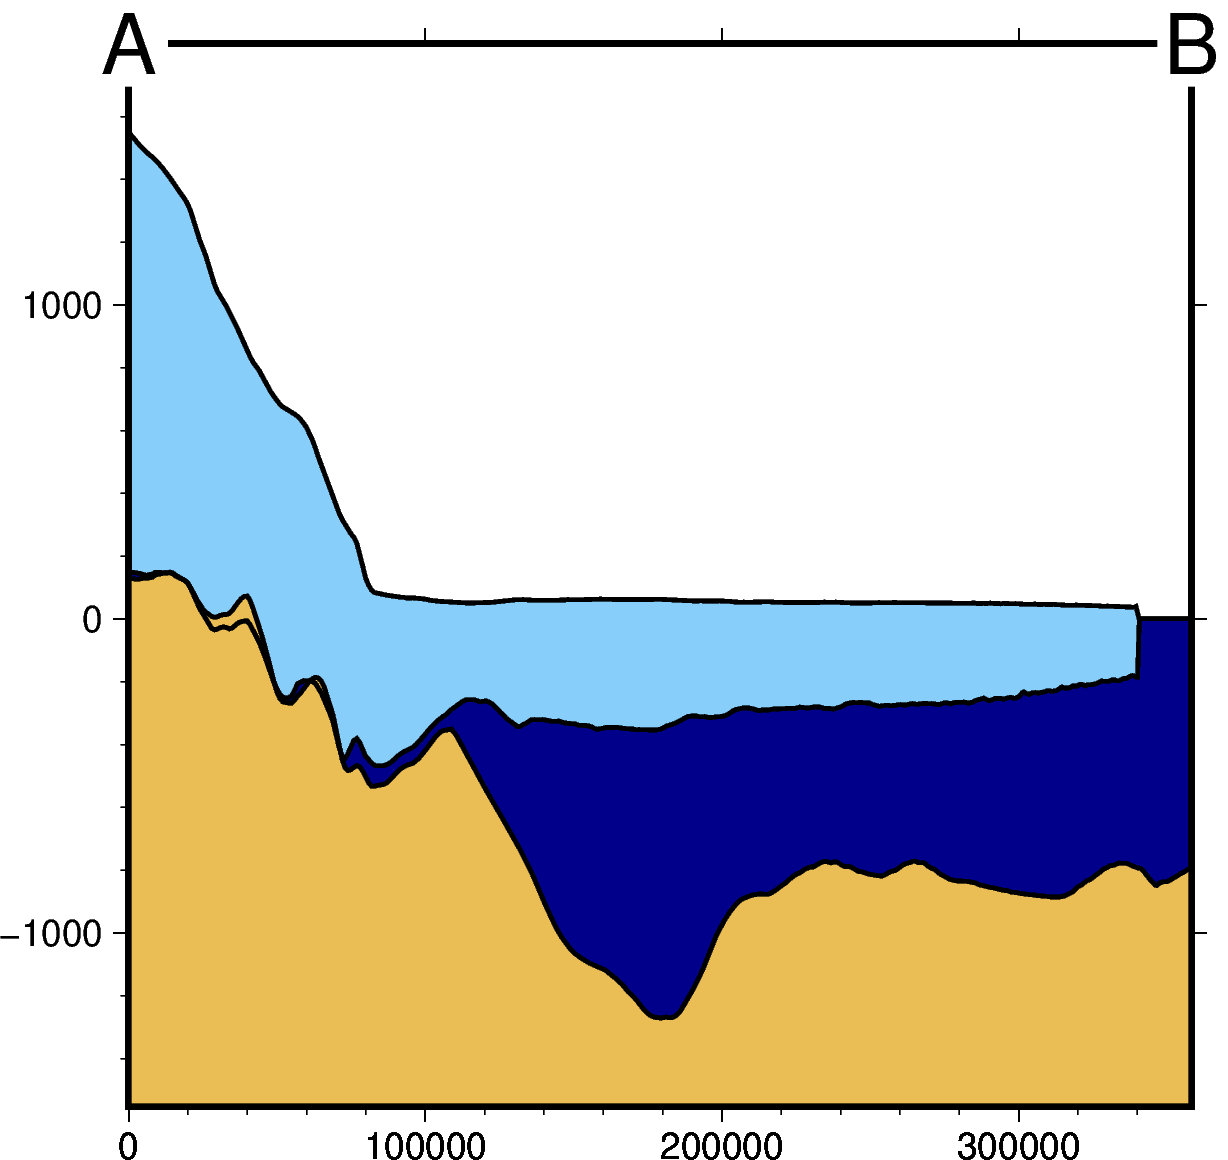

In [4]:
# use a pre-made shapefile to define the line
# defaults to an included shapefile over the Ross Ice Shelf
# from Mulock Glacier to the ice front through Discover Deep.
profile.plot_profile(
    method='shapefile',
    add_map=False,
    )

### 2b) change sampling resolution

In [5]:
# decrease resolution with parameter shp_num_points
profile.plot_profile(
    method='shapefile',
    add_map=False,
    shp_num_points=10,
    )

filling grid nans with "0"
filling grid nans with "0"


KeyboardInterrupt: 

## Cross section with map
### 3a) default imagery

In [ ]:
# add a map to show the location
profile.plot_profile(
    method='shapefile',
    add_map=True,
    )

### 3b) custom map background

In [ ]:
# change the map background to show the surface topography instead of imagery
profile.plot_profile(
    method='shapefile',
    add_map=True,
    map_background=fetch.bedmap2('surface')
    )

### 3c) clip profile

In [ ]:
# clip the profile (either end) based on distance
profile.plot_profile(
    method='shapefile',
    add_map=True,
    clip=True,
    min_dist=50e3,
    max_dist=200e3,
    )

## Cross section with map and data
### 4a) with default datasets

In [ ]:
# sample and plot 2 default datasets, Free-air gravity and magnetic anomalies.
profile.plot_profile(
    method='shapefile',
    add_map=True,
    data_dict='default',
    save=True, # save the plot to use in README 
    path='../cover_fig.png'
    )

### 4b) custom layers, datasets, and shapefiles
The input for both the data and the layers are nested dictionaries, where each dataset is a dictionary which contains keys: 'name', 'grid', and 'color'.

Use the function, `profile.make_data_dict()` to help create these dictionaries.
It takes 3 inputs, which are an array of names, an array of grids (either file geotiff/netcdf file names or xarray.DataArrays, and an array of colors. 

For example, if you have a netcdf file 'ice_velocity.nc', you can make that into a dictionary with: 
    `profile.make_data_dict(['ice velocity'], ['ice_velocity.nc'], ['orange'])`

Within the module `antarctic_plots.fetch` is a series of functions to help download, store, and call datasets. Feel free to use the examples there to add your own datasets, and load them into `profile.make_data_dict()` as shown below.


In [ ]:
# note, these datafile can be plotted at higher resolution by adding parameter 'spacing' tp the 'fetch' function:
# fetch.gravity('BA', spacing=1e3) will use a 1km version of the Bouguer gravity anomaly.
data_dict = profile.make_data_dict(['Bouguer gravity', 'DeepBedMap'], [fetch.gravity('BA'), fetch.deepbedmap()], ['purple', 'red'])

# get default bedmap2 layers
layers_dict=profile.default_layers()
# add dictionary entry of extra layer 'basement'
layers_dict['basement']={}
layers_dict['basement']['name']='basement'
layers_dict['basement']['grid']=fetch.basement()
layers_dict['basement']['color']='chocolate'

profile.plot_profile(
    method='shapefile',
    shapefile=fetch.sample_shp('Roosevelt_Island'), # to use your own shapefile, shapefile='yourshapefile.shp',
    add_map=True,
    data_dict=data_dict,
    layers_dict=layers_dict,
    )

### 4c) fill layer gaps

In [ ]:
# note that the additional layer 'basement', doesn't extend past the groundingline. By default, NaN's in any layer are set equal 
# to the layer above, causing the vertical line at ~100km.
# to remove this feature, set 
profile.plot_profile(
    method='shapefile',
    shapefile=fetch.sample_shp('Roosevelt_Island'),
    add_map=True,
    data_dict=data_dict,
    layers_dict=layers_dict,
    fillnans=False
    )

### 4d) change map zoom

In [ ]:
# we can change the zoom of the map with the buffer_perc argument
# this is a percentage of total line distance, so in this case
# we zoom out by 80% of 330km, so ~260km
profile.plot_profile(
    method='shapefile',
    shapefile=fetch.sample_shp('Roosevelt_Island'),
    add_map=True,
    data_dict=data_dict,
    layers_dict=layers_dict,
    buffer_perc=.8,
    )